Question 1

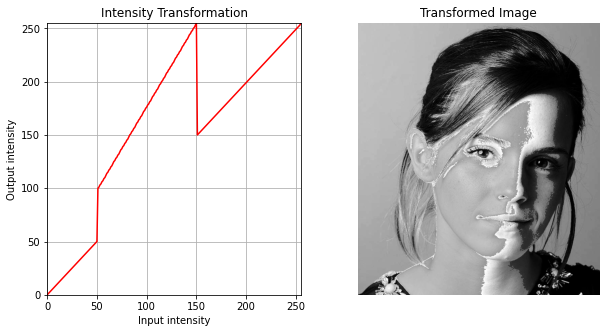

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,1]+1-0).astype('uint8')
t2 = np.linspace(c[0,0],255,c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0],255,255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

im_org = cv.imread("C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)
im_transf = cv.LUT(im_org, transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the lookup table
ax[0].plot(transform, 'r', label='Identity')
ax[0].set_title('Intensity Transformation')
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')

#Plot transformed Image
ax[1].imshow(im_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

plt.show()

Question 2

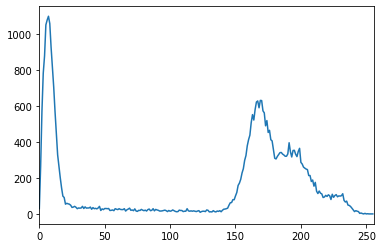

In [45]:
img = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
hist=cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()


(0.0, 255.0)

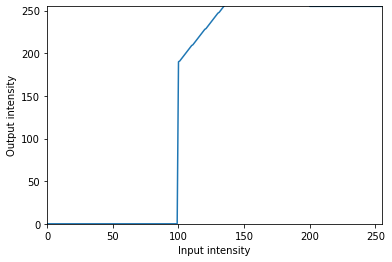

In [46]:
img_org = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

pixels = np.arange(0,256)
pixels[0:100] = 0
pixels[100:200] = 1.9*pixels[100:200]
pixels[200:256] = 255

def intensity_trans(img):
    img_transf = np.zeros_like(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_transf[i,j] = pixels[img[i,j]]
    return img_transf

img_transf = intensity_trans(img_org)

fig, ax = plt.subplots()
ax.plot(pixels)
ax.set_xlabel("Input intensity")
ax.set_ylabel("Output intensity")
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)

Text(0.5, 1.0, 'Transformed Image')

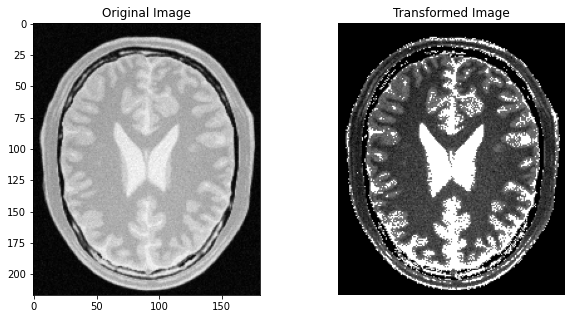

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#Plot original Image
ax[0].imshow(img_org, cmap='gray')
ax[0].set_title('Original Image')

#Plot transformed Image
ax[1].imshow(img_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

Text(0.5, 1.0, 'Transformed Image')

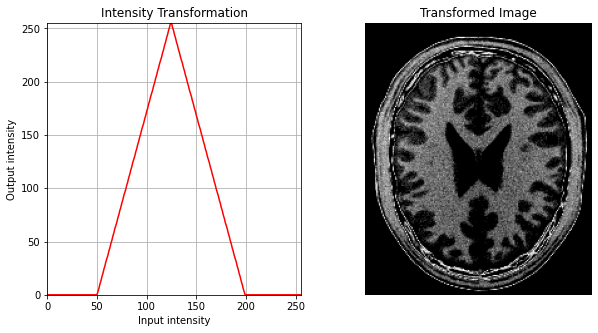

In [48]:
c = np.array([(125,50),(75,200)])

t1 = np.linspace(0,0,c[0,1]).astype('uint8')
t2 = np.linspace(0,255,c[1,0]).astype('uint8')
t3 = np.linspace(255,0,c[1,0]).astype('uint8')
t4 = np.linspace(0,0,c[0,1]+6).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the lookup table
ax[0].plot(transform, 'r', label='Identity')
ax[0].set_title('Intensity Transformation')
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')


im_transf = cv.LUT(img_org, transform)

#Plot transformed Image
ax[1].imshow(im_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

Question 3

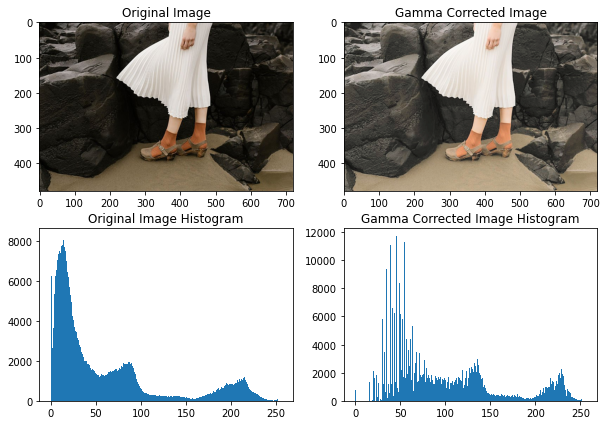

In [49]:
img_org = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

img_lab = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
img_lab_planes = cv.split(img_lab)#
img_l = img_lab_planes[0]

#Adjust Gamma Values
gamma = 1.9
#Gamma Correction
img_l_gamma = np.power((img_l/255),1/gamma)*255

#Updating L channel with gamma-corrected values
img_lab_gamcor = cv.merge((img_l_gamma.astype('uint8'), img_lab_planes[1].astype('uint8'), img_lab_planes[2].astype('uint8')))
img_gamma = cv.cvtColor(img_lab_gamcor, cv.COLOR_LAB2BGR)

#Display the orig and transf images and relevant histogram
fig, ax = plt.subplots(2,2,figsize=(10,7))
ax[0,0].imshow(img_org[:,:,::-1])     #RGB to BGR
ax[0,0].set_title('Original Image')
ax[0,1].imshow(img_gamma[:,:,::-1])   #RGB to BGR
ax[0,1].set_title('Gamma Corrected Image')
ax[1,0].hist(img_org[:,:,0].ravel(), 256, [0,256])
ax[1,0].set_title('Original Image Histogram')
ax[1,1].hist(img_gamma[:,:,0].ravel(), 256, [0,256])
ax[1,1].set_title('Gamma Corrected Image Histogram')
plt.show()



Question 4

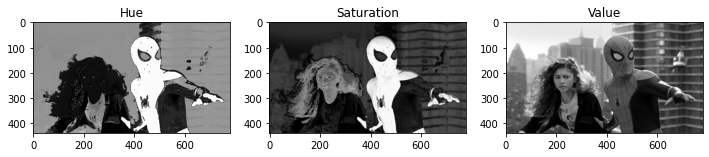

In [50]:
img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/spider.png', cv.IMREAD_COLOR)

# Split into HSV channels
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_hsv_planes = cv.split(img_hsv)
img_h = img_hsv_planes[0]
img_s = img_hsv_planes[1]
img_v = img_hsv_planes[2]

#plot h,s,v plane images

fig, ax = plt.subplots(1,3, figsize=(12,7))
ax[0].imshow(img_h, cmap ='gray')
ax[0].set_title('Hue')
ax[1].imshow(img_s, cmap ='gray')
ax[1].set_title('Saturation')
ax[2].imshow(img_v, cmap ='gray')
ax[2].set_title('Value')
plt.show()



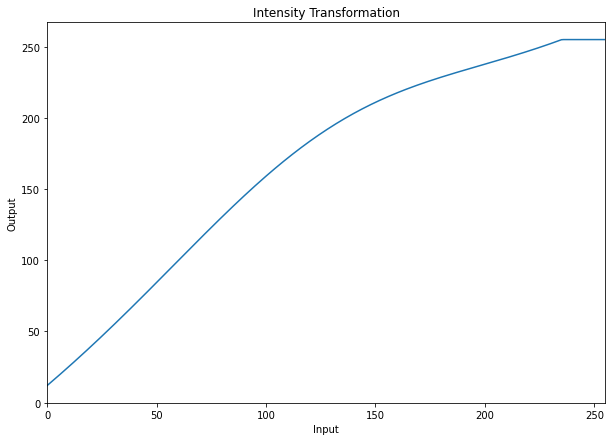

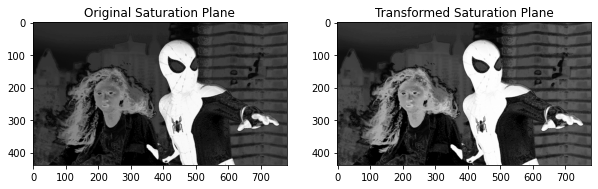

In [51]:
a = 0.5
sigma = 70

def f(x,a):
    sec_1 = x + a*128*np.exp((-1)*((x-128)**2)/(2*(sigma)**2))
    minimum = min(255, sec_1)
    return minimum

#plot the transformation

x = np.linspace(0,255,256)
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = f(x[i],a)

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(x,y)
ax.set_title('Intensity Transformation')
ax.set_xlabel("Input")
ax.set_ylabel("Output")
ax.set_xlim(0, 255)

img_s_transformed = np.zeros_like(img_s)
for i in range(len(img_s)):
    for j in range(len(img_s[0])):
        img_s_transformed[i,j] = f(img_s[i,j], a)

#display the s plane
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_s, cmap='gray')
ax[0].set_title('Original Saturation Plane')
ax[1].imshow(img_s_transformed, cmap='gray')
ax[1].set_title('Transformed Saturation Plane')

plt.show()



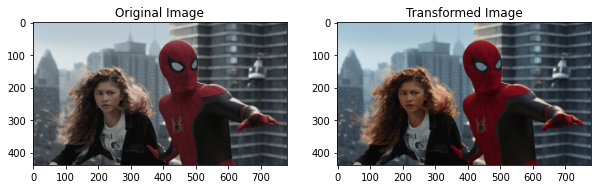

In [52]:
img_hsv_planes = [img_h, img_s_transformed, img_v]
img_hsv_transformed = cv.merge(img_hsv_planes)
img_transformed = cv.cvtColor(img_hsv_transformed, cv.COLOR_HSV2BGR)

#display the transoformation
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[0].imshow(img_orig[:,:,::-1])
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed[:,:,::-1])
ax[1].set_title('Transformed Image')
plt.show()


Question 5

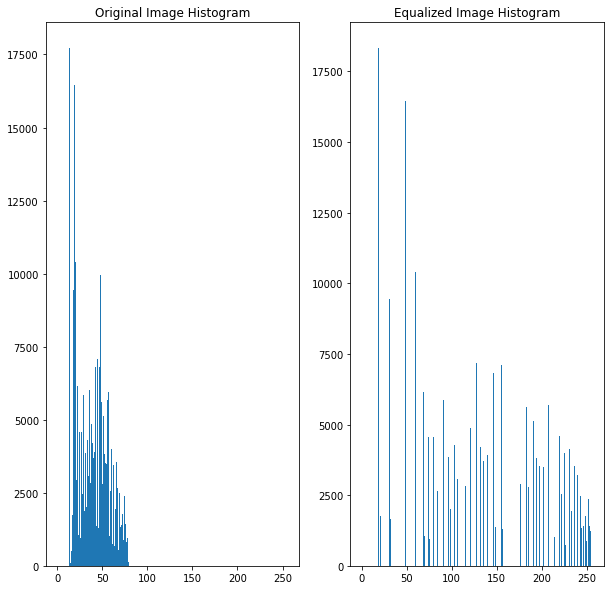

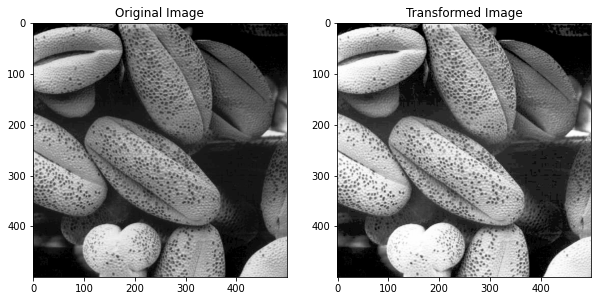

In [53]:
img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/shells.tif', cv.IMREAD_GRAYSCALE)

# Histogram Equalization Function
def hist_equalization(img):
    hist = np.zeros(256)
    # Calculate histogram
    for i in range(len(img)):
        for j in range(len(img[0])):
            hist[img[i, j]] += 1
    cdf = hist.cumsum()   #Cumulative Distribution Function
    cdf_normalized = (255*cdf)/(img.shape[0]*img.shape[1])  #Normalized CDF
    equalized_img = np.interp(img.flatten(), range(256), cdf_normalized).reshape(img.shape)
    return equalized_img.astype(np.uint8)

#Apply function to the image
img_equalized = hist_equalization(img_orig)

#Plot Original and Tranaformed Histograms
fig, ax = plt.subplots(1,2, figsize=(10, 10))
ax[0].hist(img_orig.flatten(), 256, [0,256])
ax[0].set_title('Original Image Histogram')
ax[1].hist(img_equalized.flatten(), 256, [0,256])
ax[1].set_title('Equalized Image Histogram')
plt.show()

#Plot Original and Tranaformed Images
fig, ax = plt.subplots(1,2, figsize=(10, 12))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_equalized, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

    

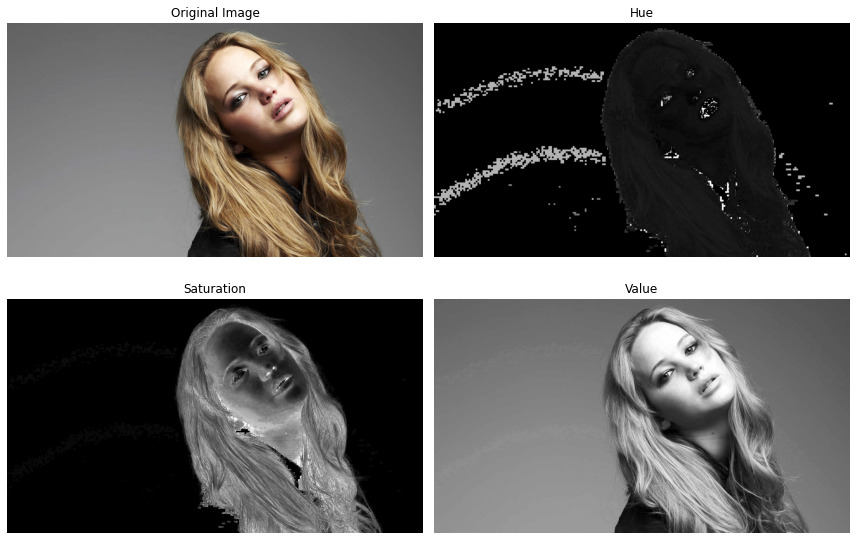

In [73]:
img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/jeniffer.jpg')

# Split into HSV channels
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_hsv_planes = cv.split(img_hsv)
img_h = img_hsv_planes[0]
img_s = img_hsv_planes[1]
img_v = img_hsv_planes[2]

fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(img_h, cmap='gray')
ax[0,1].set_title('Hue')
ax[0,1].axis('off')

ax[1,0].imshow(img_s, cmap='gray')
ax[1,0].set_title('Saturation')
ax[1,0].axis('off')

ax[1,1].imshow(img_v, cmap='gray')
ax[1,1].set_title('Value')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

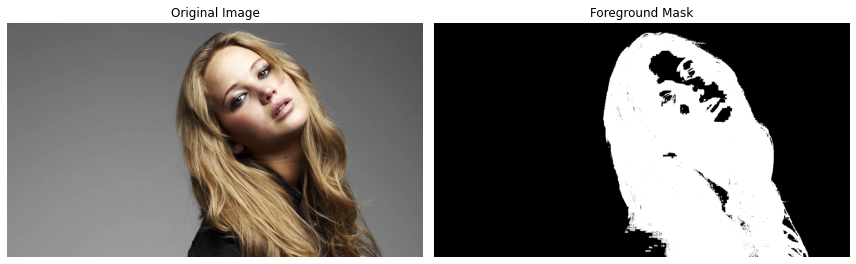

In [130]:
# Applying threshold to the saturation plane
threshold = 45
_,mask = cv.threshold(img_s, threshold,255,cv.THRESH_BINARY)

#Display Mask
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Foreground Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

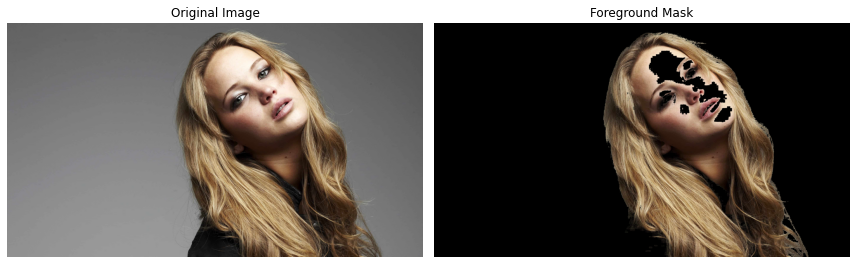

In [131]:
#Convert mask into BGR
mask = cv.cvtColor(mask.astype('uint8'), cv.COLOR_GRAY2BGR)

#Obtain foreground using only cv.bitwise
img_foreground = cv.bitwise_and(img_orig,mask)
hist  = cv.calcHist([img_foreground], [0], mask[:,:,0], [256], [0,256])

#display the foreground
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_foreground, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

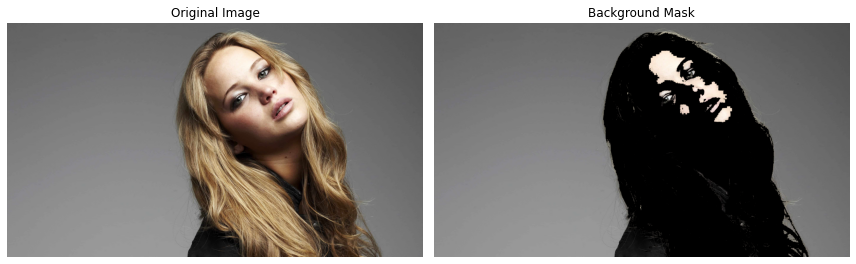

In [132]:
#Obtaining cumulative sum of the histogram
cum_sum = np.cumsum(hist)

#total number of pixels in the image
MN = len(img_orig)*len(img_orig[0])

#Histogram Equalization Formula
def hist_equal(x):
    return 255*cum_sum[x]/MN

#Splitting foreground into HSV planes
fg_hsv = cv.cvtColor(img_foreground, cv.COLOR_BGR2HSV)
sat = fg_hsv[:,:,1]

#Histogram Equalizing s-plane
s = np.vectorize(hist_equal)(sat)
fg_hsv[:,:,1] = s

#Converting foreground to BGR
img_foreground = cv.cvtColor(fg_hsv, cv.COLOR_HSV2BGR)

#Extracting Background
img_background = cv.bitwise_and(img_orig, cv.bitwise_not(mask))

#Plot Background
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_background, cv.COLOR_BGR2RGB))
ax[1].set_title('Background Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

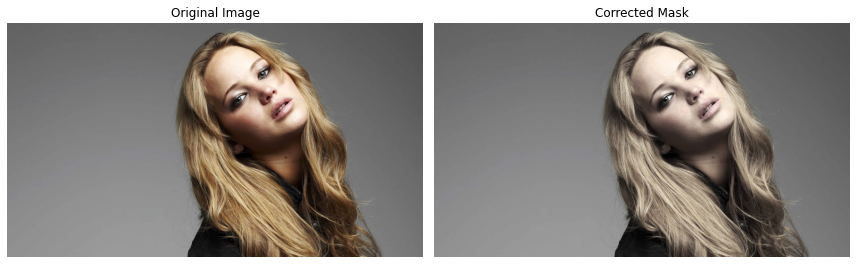

In [133]:
#Adding Background and Foreground
img_corrected = cv.add(img_foreground, img_background)

#Plot Background
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
ax[1].set_title('Corrected Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

Question 7